### 1. Load the necessary packages

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit,cross_val_score,cross_validate
from sklearn.naive_bayes import BernoulliNB,GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV



### 2. Exploring the data

In [10]:
project=pd.read_csv('../MiniProject/indian_liver_patient.csv')
project

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500.0,20.0,34.0,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98.0,35.0,31.0,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245.0,48.0,49.0,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184.0,29.0,32.0,6.8,3.4,1.00,1


### 3. Checking the datatypes

In [11]:
project.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase          float64
Alamine_Aminotransferase      float64
Aspartate_Aminotransferase    float64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

### 4. Exploring the description of the dataframe

In [12]:
project.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,582.000000,581.000000,581.000000,580.000000,583.000000,582.000000,578.000000,583.000000
mean,44.746141,3.298799,1.488144,290.254733,80.542169,110.156897,6.483190,3.141753,0.946972,1.286449
std,16.189833,6.209522,2.810482,242.925760,182.835984,289.641517,1.085451,0.796199,0.319861,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.000000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


### 5. Checking for null values

In [13]:
project.isnull().sum()

Age                           0
Gender                        3
Total_Bilirubin               0
Direct_Bilirubin              1
Alkaline_Phosphotase          2
Alamine_Aminotransferase      2
Aspartate_Aminotransferase    3
Total_Protiens                0
Albumin                       1
Albumin_and_Globulin_Ratio    5
Dataset                       0
dtype: int64

### 6. Checking for unique values in the dataframe

In [14]:
project.nunique()

Age                            72
Gender                          3
Total_Bilirubin               113
Direct_Bilirubin               80
Alkaline_Phosphotase          262
Alamine_Aminotransferase      151
Aspartate_Aminotransferase    177
Total_Protiens                 58
Albumin                        40
Albumin_and_Globulin_Ratio     69
Dataset                         2
dtype: int64

### 7. Checking for missing values

In [15]:
project.isna().sum()

Age                           0
Gender                        3
Total_Bilirubin               0
Direct_Bilirubin              1
Alkaline_Phosphotase          2
Alamine_Aminotransferase      2
Aspartate_Aminotransferase    3
Total_Protiens                0
Albumin                       1
Albumin_and_Globulin_Ratio    5
Dataset                       0
dtype: int64

### 8. Exploring the relationships between variables within a dataset.

<Axes: xlabel='Albumin_and_Globulin_Ratio', ylabel='Density'>

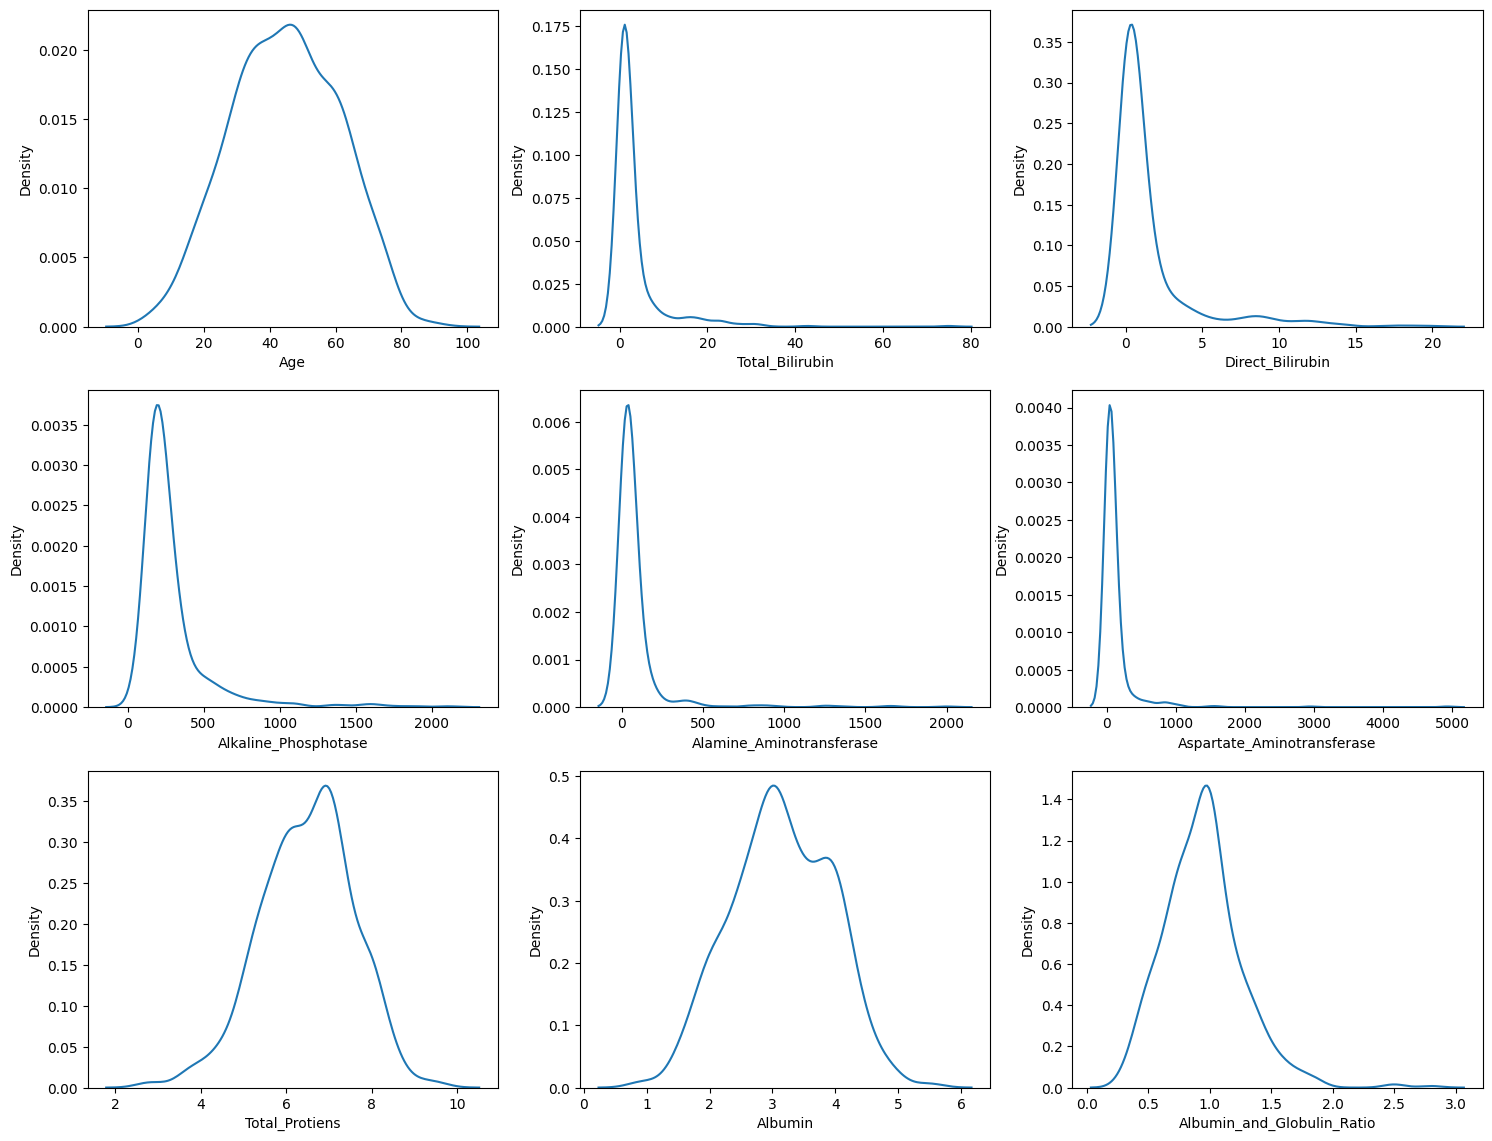

In [105]:
# Visualizing subplots for each column
fig, axes = plt.subplots(3,3, figsize=(18, 14 ))
sns.kdeplot(ax=axes[0,0],data=project,x='Age')
sns.kdeplot(ax=axes[0,1],data=project,x='Total_Bilirubin')
sns.kdeplot(ax=axes[0,2],data=project,x='Direct_Bilirubin')
sns.kdeplot(ax=axes[1,0],data=project,x='Alkaline_Phosphotase')
sns.kdeplot(ax=axes[1,1],data=project,x='Alamine_Aminotransferase')
sns.kdeplot(ax=axes[1,2],data=project,x='Aspartate_Aminotransferase')
sns.kdeplot(ax=axes[2,0],data=project,x='Total_Protiens')
sns.kdeplot(ax=axes[2,1],data=project,x='Albumin')
sns.kdeplot(ax=axes[2,2],data=project,x='Albumin_and_Globulin_Ratio')


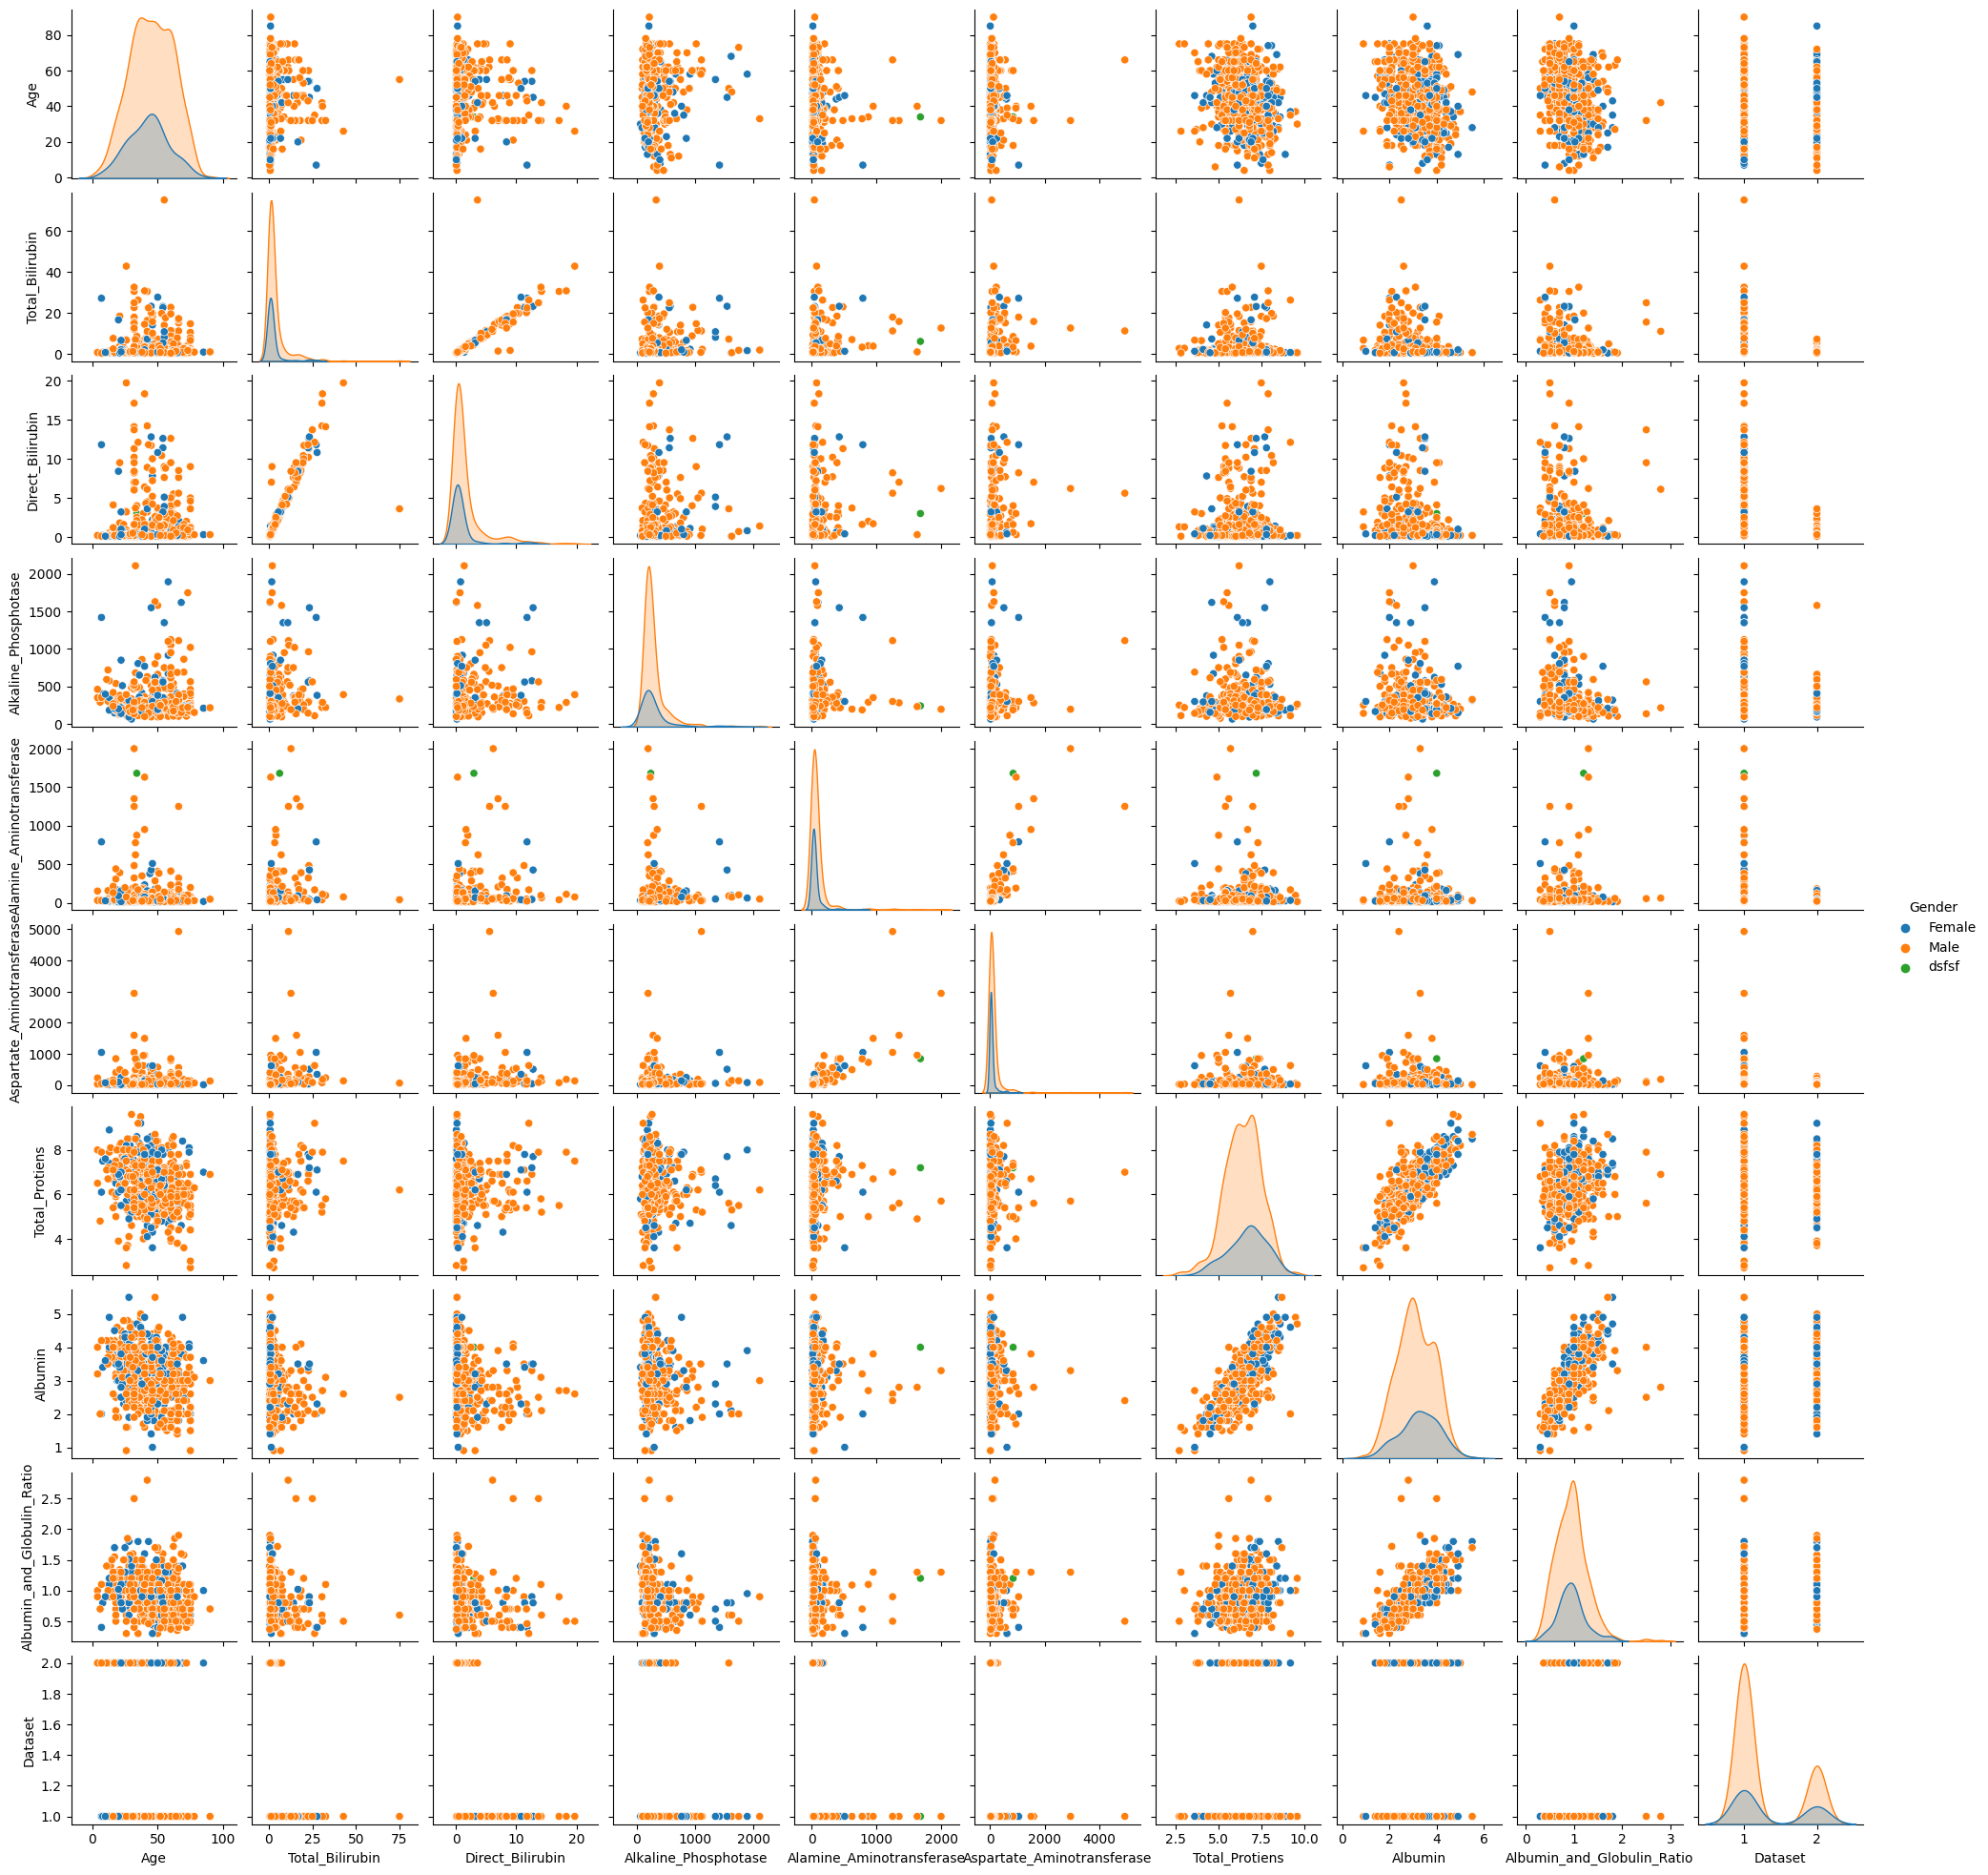

In [16]:
# Visualizing the 'Gender' column because there is nan values in it. 
sns.pairplot(project,hue='Gender',height=2)

### 9. Filling the null values (except 'Gender' column) with mean and median by seeing the above pairplot

In [17]:
# From the above visualization we can see the 'Albumin' curve is normalize so we can take the mean value 
# of it and rest of the curve is not normalize so we can take the median of it.
   
project['Albumin']=project['Albumin'].fillna(project['Albumin'].mean())
project['Direct_Bilirubin']=project['Direct_Bilirubin'].fillna(project['Direct_Bilirubin'].median())
project['Alkaline_Phosphotase']=project['Alkaline_Phosphotase'].fillna(project['Alkaline_Phosphotase'].median())
project['Alamine_Aminotransferase']=project['Alamine_Aminotransferase'].fillna(project['Alamine_Aminotransferase'].median())
project['Aspartate_Aminotransferase']=project['Aspartate_Aminotransferase'].fillna(project['Aspartate_Aminotransferase'].median())
project['Albumin_and_Globulin_Ratio']=project['Albumin_and_Globulin_Ratio'].fillna(project['Albumin_and_Globulin_Ratio'].median())



### Filling the null value of 'Gender' column using KNN Imputer

In [11]:
# Varifying the null values of all columns after filling it with mean and median, 
# only 'Gender' column is left for filling.
project.isnull().sum()

Age                           0
Gender                        3
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [18]:
# Checking the 'Gender' column by grouping it
project.groupby(['Gender']).count()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Gender,,,,,,,,,,
Female,140,140,140,140,140,140,140,140,140,140
Male,439,439,439,439,439,439,439,439,439,439
dsfsf,1,1,1,1,1,1,1,1,1,1


In [19]:
# Since we don't know the 'dsfsf' gender we can give it value between 0 and 1(say 0.5)
project=project.replace({"dsfsf":0.5})

In [20]:
project.Gender.value_counts()

Gender
Male      439
Female    140
0.5         1
Name: count, dtype: int64

In [23]:
project.Gender.isna().sum()

3

In [24]:
# Since KNN Imputer works with numbers so give numbers to Male and Female
Imputer=KNNImputer()
k=project.replace({"Male":0,"Female":1})


In [25]:
In=Imputer.fit_transform(k)
In=pd.DataFrame(data=In,columns=project.columns)

In [26]:
In.Gender.value_counts()

Gender
0.0    439
1.0    140
0.2      1
0.5      1
0.8      1
0.4      1
Name: count, dtype: int64

In [27]:
In=In.replace({0.2:0.0,0.4:0.0,0.8:1.0,0.5:1.0})

In [28]:
In.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [29]:
# Again varifying the 'Gender' column after using KNN Imputer
In.groupby(['Gender']).count()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Gender,,,,,,,,,,
0.0,441,441,441,441,441,441,441,441,441,441
1.0,142,142,142,142,142,142,142,142,142,142


### Splitting the dataset into the X and y and then into Training set and Test set

In [30]:
X=In.iloc[:, :-1] # All columns except last column or target column 
y=In.iloc[:,-1] # Only last column or target column

In [31]:
# Splitting the X,y using train_test_split method
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/5, random_state = 12)

### Feature Engineering: Normalization 

In [32]:
# Normalization using MinMaxScaler
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

### Training the Naive Bayes model on the Training set

#### a. GaussianNB

In [33]:
from sklearn.naive_bayes import GaussianNB
DTclf = GaussianNB()
DTclf.fit(X_train_normalized, y_train)

GaussianNB()

In [34]:
p=DTclf.predict(X_test_normalized)

In [35]:
print("Gaussian Naive Bayes \nAccuracy:",accuracy_score(y_test,p)*100,"\nPrecision:",precision_score(y_test,p),"\nRecall Score:",recall_score(y_test,p),"\nF1 Score:",f1_score(y_test,p),"\nConfusion Matrix:\n",confusion_matrix(y_test,p))

Gaussian Naive Bayes 
Accuracy: 47.863247863247864 
Precision: 0.9655172413793104 
Recall Score: 0.3181818181818182 
F1 Score: 0.4786324786324786 
Confusion Matrix:
 [[28 60]
 [ 1 28]]


In [36]:
print("5 Cross Validation",cross_val_score(DTclf,X_test_normalized,y_test,cv=5))

5 Cross Validation [0.75       0.54166667 0.34782609 0.60869565 0.43478261]


#### b. BernoulliNB

In [37]:
BNclf=BernoulliNB()
BNclf.fit(X_train_normalized, y_train)

BernoulliNB()

In [38]:
q=BNclf.predict(X_test_normalized)

In [39]:
print("Bernoulli Naive Bayes \nAccuracy:",accuracy_score(y_test,q)*100,"\nPrecision:",precision_score(y_test,q),"\nRecall Score:",recall_score(y_test,q),"\nF1 Score:",f1_score(y_test,q),"\nConfusion Matrix:\n",confusion_matrix(y_test,q))

Bernoulli Naive Bayes 
Accuracy: 68.37606837606837 
Precision: 0.7475728155339806 
Recall Score: 0.875 
F1 Score: 0.806282722513089 
Confusion Matrix:
 [[77 11]
 [26  3]]


In [40]:
print("5 Cross Validation",cross_val_score(BNclf,X_test_normalized,y_test,cv=5))

5 Cross Validation [0.75       0.75       0.7826087  0.73913043 0.73913043]


#### c. MultinomialNB


In [41]:
MNclf=MultinomialNB()
MNclf.fit(X_train_normalized, y_train)

MultinomialNB()

In [42]:
s=MNclf.predict(X_test_normalized)

In [43]:
print("Multinomial Naive Bayes \nAccuracy:",accuracy_score(y_test,s)*100,"\nPrecision:",precision_score(y_test,s),"\nRecall Score:",recall_score(y_test,s),"\nF1 Score:",f1_score(y_test,s),"\nConfusion Matrix:\n",confusion_matrix(y_test,s))

Multinomial Naive Bayes 
Accuracy: 75.21367521367522 
Precision: 0.7521367521367521 
Recall Score: 1.0 
F1 Score: 0.8585365853658536 
Confusion Matrix:
 [[88  0]
 [29  0]]


In [44]:
print("5 Cross Validation",cross_val_score(MNclf,X_test_normalized,y_test,cv=5))

5 Cross Validation [0.75       0.75       0.7826087  0.73913043 0.73913043]


### Training the DecisionTreeClassifier model on the Training set

In [46]:
DTCclf = DecisionTreeClassifier(criterion='gini',max_depth=1)

In [47]:
DTCclf.fit(X_train_normalized, y_train)


DecisionTreeClassifier(max_depth=1)

In [48]:
d=DTCclf.predict(X_test_normalized)

In [49]:
print("DecisionTreeClassifier \nAccuracy:",accuracy_score(y_test,d)*100,"\nPrecision:",precision_score(y_test,d),"\nRecall Score:",recall_score(y_test,d),"\nF1 Score:",f1_score(y_test,d),"\nConfusion Matrix:\n",confusion_matrix(y_test,d))

DecisionTreeClassifier 
Accuracy: 75.21367521367522 
Precision: 0.7521367521367521 
Recall Score: 1.0 
F1 Score: 0.8585365853658536 
Confusion Matrix:
 [[88  0]
 [29  0]]


In [50]:
print("5 Cross Validation",cross_val_score(DTCclf,X_test_normalized,y_test,cv=5))

5 Cross Validation [0.75       0.75       0.7826087  0.73913043 0.60869565]


## Model Tuning

### (A) Random Search 

#### (A1) Random Search for DecisionTreeClassifier

In [107]:
param_dist = {
    'max_depth':list(range(1, 5)),
    'min_samples_split':list(range(2, 5)),
    'min_samples_leaf':list(range(1, 5))
}

random_search = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=param_dist, n_iter=3, cv=5, random_state=42)
random_search.fit(X_train_normalized, y_train)
random_search_best_params = random_search.best_params_
random_search.cv_results_
print ("Best hyperparameters: ", random_search.best_params_)
print ("Best score: ", random_search.best_score_)
op=pd.DataFrame(random_search.cv_results_)
op

Best hyperparameters:  {'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 3}
Best score:  0.6395790436970944


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001051,0.000330,0.000431,0.000071,2,2,3,"{'min_samples_split': 2, 'min_samples_leaf': 2...",0.595745,0.634409,0.623656,0.655914,0.677419,0.637429,0.027847,2
1,0.001024,0.000074,0.000443,0.000088,3,2,4,"{'min_samples_split': 3, 'min_samples_leaf': 2...",0.606383,0.623656,0.623656,0.655914,0.655914,0.633105,0.019663,3
2,0.000846,0.000050,0.000364,0.000005,4,1,3,"{'min_samples_split': 4, 'min_samples_leaf': 1...",0.595745,0.634409,0.634409,0.655914,0.677419,0.639579,0.027106,1


In [52]:
random_search.best_params_

{'min_samples_split': 3, 'min_samples_leaf': 2, 'max_depth': 4}

In [53]:
op.mean_score_time.min()

0.0006975650787353516

In [90]:
random_search.best_score_

0.6374285060626858

#### (A2) Random Search for GaussianNB

In [80]:
 # Define the parameter distributions for random search
param_dist = {'var_smoothing': (1,5)}

gnb = GaussianNB()
random_searchqw = RandomizedSearchCV(gnb, param_distributions=param_dist, n_iter=2, cv=5)
random_searchqw.fit(X_train_normalized, y_train)
print("Best hyperparameters: ", random_searchqw.best_params_)
print("Best score: ", random_searchqw.best_score_)

Best hyperparameters:  {'var_smoothing': 1}
Best score:  0.7038663921299475


#### (A3) Random Search for BernoulliNB

In [81]:
param_grid = {
    'alpha': uniform(0.0, 2.0),    
}

# Create an instance of the Bernoulli Naive Bayes classifier
bnb = BernoulliNB()

# Perform the random search for hyperparameter tuning
random_search_l = RandomizedSearchCV(bnb, param_distributions=param_grid, n_iter=2, cv=5)
random_search_l.fit(X_train_normalized, y_train)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters: ", random_search_l.best_params_)
print("Best score: ", random_search_l.best_score_)
random_search_l.cv_results_
pd.DataFrame(random_search_l.cv_results_)

Best hyperparameters:  {'alpha': 1.7502837549974486}
Best score:  0.6973690231068407


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001395,0.000567,0.000590,0.000051,1.750284,{'alpha': 1.7502837549974486},0.723404,0.655914,0.72043,0.698925,0.688172,0.697369,0.024557,1
1,0.001255,0.000284,0.000579,0.000060,1.473905,{'alpha': 1.4739050282418615},0.723404,0.655914,0.72043,0.698925,0.688172,0.697369,0.024557,1


### (B) GridSearch

#### (B1) Grid Search for GaussianNB

In [82]:
nb = GaussianNB()

# Define the parameter grid for GridSearchCV
param_grid = {
    'var_smoothing': [1,5]  # Values for the 'var_smoothing' parameter
}

# Perform hyperparameter optimization using GridSearchCV
grid_search = GridSearchCV(nb, param_grid=param_grid, cv=5)
grid_search.fit(X_train_normalized, y_train)

# Get the best hyperparameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train a Gaussian Naive Bayes classifier using the best hyperparameters
best_nb = GaussianNB(var_smoothing=best_params['var_smoothing'])
best_nb.fit(X_train_normalized, y_train)

# Evaluate the model's accuracy on the testing data
accuracy = best_nb.score(X_test_normalized, y_test)
print("Accuracy:", accuracy)
pd.DataFrame(grid_search.cv_results_)

Best Hyperparameters: {'var_smoothing': 1}
Accuracy: 0.7521367521367521


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001037,0.000160,0.000748,0.000095,1,{'var_smoothing': 1},0.702128,0.709677,0.709677,0.698925,0.698925,0.703866,0.004887,1
1,0.001296,0.000234,0.000837,0.000093,5,{'var_smoothing': 5},0.702128,0.709677,0.709677,0.698925,0.698925,0.703866,0.004887,1


#### (B2) Grid Search for BernoulliNB

In [84]:
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0],
}

# Create an instance of the Bernoulli Naive Bayes classifier
bnb = BernoulliNB()

# Perform the grid search for hyperparameter tuning
grid_search_p = GridSearchCV(bnb, param_grid=param_grid,cv=5)
grid_search_p.fit(X_train_normalized, y_train)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters: ", grid_search_p.best_params_)
print("Best score: ", grid_search_p.best_score_)
grid_search_p.cv_results_
pd.DataFrame(grid_search_p.cv_results_).head(3)

Best hyperparameters:  {'alpha': 0.1}
Best score:  0.6973690231068407


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001230,0.000274,0.000584,0.000065,0.1,{'alpha': 0.1},0.723404,0.655914,0.72043,0.698925,0.688172,0.697369,0.024557,1
1,0.001376,0.000204,0.000757,0.000116,0.5,{'alpha': 0.5},0.723404,0.655914,0.72043,0.698925,0.688172,0.697369,0.024557,1
2,0.001419,0.000135,0.000722,0.000061,1.0,{'alpha': 1.0},0.723404,0.655914,0.72043,0.698925,0.688172,0.697369,0.024557,1


#### (B3) Grid Search for DecisionTreeClassifier

In [91]:
param_grid = {
    'max_depth': list(range(1, 5)),
    'min_samples_split':  list(range(2, 5)),
    'min_samples_leaf': list(range(1, 5))
}

grid_search_kl = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=5)
grid_search_kl.fit(X_train_normalized, y_train)
grid_search_best_params = grid_search_kl.best_params_
print("Best hyperparameters: ", grid_search_kl.best_params_)
print("Best score: ", grid_search_kl.best_score_)

grid_search_kl.cv_results_
#lo=pd.DataFrame(grid_search.cv_results_)[['mean_score_time','params','mean_test_score']].head(3)
lo=pd.DataFrame(grid_search_kl.cv_results_).head(3)
lo

Best hyperparameters:  {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score:  0.7038663921299475


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001338,0.000577,0.000841,0.000229,1,1,2,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.702128,0.709677,0.709677,0.698925,0.698925,0.703866,0.004887,1
1,0.001175,0.000264,0.000716,0.000080,1,1,3,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.702128,0.709677,0.709677,0.698925,0.698925,0.703866,0.004887,1
2,0.000970,0.000018,0.000661,0.000051,1,1,4,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.702128,0.709677,0.709677,0.698925,0.698925,0.703866,0.004887,1


In [162]:
lo.mean_score_time.min()


0.000527048110961914

In [163]:
 grid_search.best_score_

0.7038663921299475

In [164]:
 grid_search.best_params_

{'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}

### Evaluting the Hyperparameter tuning 

In [92]:
pd.DataFrame({
    'Model':['DecisionTreeClassifier','GaussianNB','BernoulliNB','DecisionTreeClassifier','GaussianNB','BernoulliNB'],
    'Tuning Technique':['Random Search','Random Search','Random Search','Grid Search','Grid Search','Grid Search'],
    'Best Hyperparameter':[random_search.best_params_,random_searchqw.best_params_,random_search_l.best_params_, grid_search_kl.best_params_,best_params,grid_search_p.best_params_,],
    'Accuracy':[random_search.best_score_,random_searchqw.best_score_,random_search_l.best_score_,grid_search_kl.best_score_,accuracy,grid_search_p.best_score_]
})

,Model,Tuning Technique,Best Hyperparameter,Accuracy
0,DecisionTreeClassifier,Random Search,"{'min_samples_split': 2, 'min_samples_leaf': 2...",0.637429
1,GaussianNB,Random Search,{'var_smoothing': 1},0.703866
2,BernoulliNB,Random Search,{'alpha': 1.7502837549974486},0.697369
3,DecisionTreeClassifier,Grid Search,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.703866
4,GaussianNB,Grid Search,{'var_smoothing': 1},0.752137
5,BernoulliNB,Grid Search,{'alpha': 0.1},0.697369


### Evaluting the Classification Report

In [94]:
results = pd.DataFrame({
    'Model': ['GaussianNB','BernoulliNB','MultinomialNB','DecisionTreeClassifier'],
    'Precision':[precision_score(y_test,p),precision_score(y_test,q),precision_score(y_test,s),precision_score(y_test,d)],
    'Recall':[recall_score(y_test,p),recall_score(y_test,q),recall_score(y_test,s),recall_score(y_test,d)],
    'F1 Score':[f1_score(y_test,p),f1_score(y_test,q),f1_score(y_test,s),f1_score(y_test,d)],
    'Accuracy':[accuracy_score(y_test,p)*100,accuracy_score(y_test,q)*100,accuracy_score(y_test,s)*100,accuracy_score(y_test,d)*100]
})
results

,Model,Precision,Recall,F1 Score,Accuracy
0,GaussianNB,0.965517,0.318182,0.478632,47.863248
1,BernoulliNB,0.747573,0.875000,0.806283,68.376068
2,MultinomialNB,0.752137,1.000000,0.858537,75.213675
3,DecisionTreeClassifier,0.752137,1.000000,0.858537,75.213675


In [195]:
from sklearn.metrics import classification_report

print('''"GaussianNB"''',classification_report(y_test,p))
print('''"BernoulliNB"''',classification_report(y_test,q))
print('''"MultinomialNB"''',classification_report(y_test,s))
print('''"DecisionTreeClassifier"''',classification_report(y_test,d))


"GaussianNB"               precision    recall  f1-score   support

         1.0       0.75      0.88      0.81        88
         2.0       0.21      0.10      0.14        29

    accuracy                           0.68       117
   macro avg       0.48      0.49      0.47       117
weighted avg       0.62      0.68      0.64       117

"BernoulliNB"               precision    recall  f1-score   support

         1.0       0.75      0.88      0.81        88
         2.0       0.21      0.10      0.14        29

    accuracy                           0.68       117
   macro avg       0.48      0.49      0.47       117
weighted avg       0.62      0.68      0.64       117

"MultinomialNB"               precision    recall  f1-score   support

         1.0       0.75      1.00      0.86        88
         2.0       0.00      0.00      0.00        29

    accuracy                           0.75       117
   macro avg       0.38      0.50      0.43       117
weighted avg       0.57      0.

/home/himanshu/machine/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/himanshu/machine/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/himanshu/machine/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/himanshu/machine/lib/pyth

### Saving the model into a csv file

In [95]:
results.to_csv('classification_results.csv', index=False)


### Saving the Trained model using 'Pickle' library

In [96]:
import pickle
filename='Trained_model.pkl'
pickle.dump(DTCclf,open(filename,'wb'))